In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics
from sklearn.model_selection import train_test_split
import statistics
from sklearn.model_selection import validation_curve


In [2]:
# Open, parse, and segregate data into training and testing sets
with open("winequality-red.csv") as f:
    txt = f.read()
    X, y = list(), list()
    txtlines = txt.split('\n')
    labels_raw = txtlines[0].split(';')
    labels = [lbl.replace('"','') for lbl in labels_raw]
    for label in labels:
        label = label.replace('"','')
    for line in txtlines[1:]:
        if len(line) > 0:
            elems = line.split(';')
            X.append([float(e) for e in elems[0:-1]])
            y.append(int(elems[-1]))
    X = np.array(X)
    y = np.array(y)

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.3,random_state=420) # X_te, Y_te, are reserved for final verification
# X_tr, X_te, y_tr, y_te = train_test_split(X_tr, y_tr, test_size=0.3, random_state=420)

In [10]:
labels #X is 11-dimensional

#Candidate models:
# SVM (should be RBF? [check!]), 
# Random forest classifier (if overfit [check!])?

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [6]:
# Grid search for optimal hyperparameters for classification, including kernel type
from sklearn.model_selection import GridSearchCV

parameters = {"C":(1, 5, 10, 20, 50, 100),"kernel":('linear','rbf','sigmoid')}
search = GridSearchCV(svm.SVC(),parameters,n_jobs=4,cv=3,iid=True, verbose=10)
search.fit(X_tr,y_tr)
print(f"tuned hyperparameters :{search.best_params_}")
print("Best cross-validation score: {:.2f}".format(search.best_score_))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   25.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   44.8s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  54 out of  54 | elapsed:  5.0min finished
tuned hyperparameters :{'C': 100, 'kernel': 'linear'}
Best cross-validation score: 0.58


In [9]:
# Finer grid search to optimize the value of C
parameters = {"C":(20, 50, 70, 100, 120, 150, 200, 300, 500)}
search = GridSearchCV(svm.SVC(kernel='linear'),parameters,n_jobs=4,cv=3,iid=True, verbose=10)
search.fit(X_tr,y_tr)
print(f"tuned hyperparameters :{search.best_params_}")
print("Best cross-validation score: {:.2f}".format(search.best_score_))

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:  8.8min
[Parallel(n_jobs=4)]: Done  23 out of  27 | elapsed: 14.0min remaining:  2.4min
[Parallel(n_jobs=4)]: Done  27 out of  27 | elapsed: 17.3min finished
tuned hyperparameters :{'C': 120}
Best cross-validation score: 0.59


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] C=1 .............................................................
[CV] ............. C=1, score=(train=0.579, test=0.572), total=   1.6s
[CV] C=10 ............................................................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[CV] ............ C=10, score=(train=0.600, test=0.581), total=  22.4s
[CV] C=20 ............................................................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.9s remaining:    0.0s
[CV] ............ C=20, score=(train=0.608, test=0.581), total=  38.5s
[CV] C=50 ............................................................
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min remaining:    0.0s
[CV] ............ C=50, score=(train=0.608, test=0.583), total= 1.0min
[CV] C=70 ............................................................
[Parallel(n_jobs=1)]: Done   4 out of   

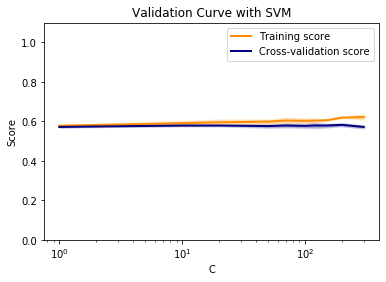

In [27]:
# Plot fit performance vs C
C = (1, 10, 20, 50, 70, 100, 120, 150, 200, 300)
train_scores, test_scores = validation_curve(svm.SVC(kernel='linear'),X_tr,y_tr,"C",C,cv=2,n_jobs=4,verbose=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(C, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(C, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(C, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(C, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  20 | elapsed:    3.9s remaining:   22.6s
[Parallel(n_jobs=4)]: Done   6 out of  20 | elapsed:    4.0s remaining:    9.6s
[Parallel(n_jobs=4)]: Done   9 out of  20 | elapsed:    4.2s remaining:    5.1s
[Parallel(n_jobs=4)]: Done  12 out of  20 | elapsed:    4.3s remaining:    2.8s
[Parallel(n_jobs=4)]: Done  15 out of  20 | elapsed:    4.3s remaining:    1.4s
[Parallel(n_jobs=4)]: Done  18 out of  20 | elapsed:    4.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    4.5s finished


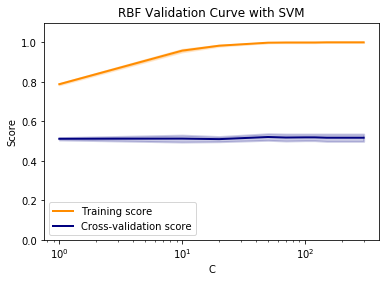

In [11]:
# Plot fit vs C, but for an RBF (Radial Basis Function) kernel instead of a linear one
C = (1, 10, 20, 50, 70, 100, 120, 150, 200, 300)
train_scores, test_scores = validation_curve(svm.SVC(kernel='rbf'),X_tr,y_tr,"C",C,cv=2,n_jobs=4,verbose=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("RBF Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(C, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(C, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(C, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(C, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  20 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=4)]: Done   6 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done   9 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  12 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  18 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


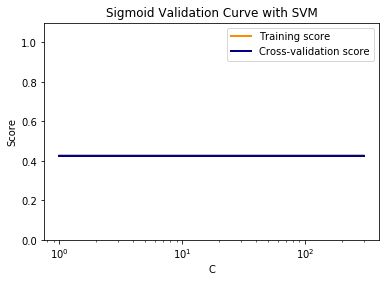

In [40]:
# Repeat above for a sigmoid kernel function
C = (1, 10, 20, 50, 70, 100, 120, 150, 200, 300)
train_scores, test_scores = validation_curve(svm.SVC(kernel='sigmoid'),X_tr,y_tr,"C",C,cv=2,n_jobs=4,verbose=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Sigmoid Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(C, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(C, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(C, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(C, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [41]:
# Plotting fit vs C for polynomial kernel function
#DO NOT RUN: HANGS (due to excessive resource usage)
C = (1, 10, 20, 50, 70, 100, 120, 150)
train_scores, test_scores = validation_curve(svm.SVC(kernel='poly'),X_tr,y_tr,"C",C,cv=2,n_jobs=4,verbose=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("RBF Validation Curve with SVM")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(C, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(C, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(C, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(C, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


In [4]:
# Train the experimentally optimal model

kern, c = ('linear',120)
clf = svm.SVC(kernel=kern,C=c) 
clf.fit(X_tr,y_tr)

SVC(C=120, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [5]:
# Analyze the optimal model from above
from sklearn.metrics import confusion_matrix

def mean(L):
    return sum(L)/len(L)
def MSE(true,pred):
    return mean((pred-true)**2)

y_pred_1 = clf.predict(X_tr)
print(f"Accuracy ({kern}, C={c}):")
print("\tTraining Accuracy:",
    round(metrics.accuracy_score(y_tr,y_pred_1),6))
print("\t\tMean inaccuracy:",
    round(mean(y_pred_1-y_tr),6))
print("\t\tMSE:",
    round(MSE(y_tr,y_pred_1),6))
print(confusion_matrix(y_tr,y_pred_1))

y_pred_2 = clf.predict(X_te)
print("\tValidation Accuracy:",
    round(metrics.accuracy_score(y_te,y_pred_2),6))
print("\t\tMean inaccuracy:",
    round(mean(y_pred_2-y_te),6))
print("\t\tMSE:",
    round(MSE(y_te,y_pred_2),6))
print(confusion_matrix(y_te,y_pred_2))


Accuracy (linear, C=120):
	Training Accuracy: 0.582663
		Mean inaccuracy: -0.137623
		MSE: 0.529044
[[  2   0   6   1   0   0]
 [  0   0  32  12   0   0]
 [  1   0 372 104   1   0]
 [  0   0 163 278   0   0]
 [  0   0  11 128   0   0]
 [  0   0   0   8   0   0]]
	Validation Accuracy: 0.591667
		Mean inaccuracy: -0.191667
		MSE: 0.520833
[[  0   0   1   0   0   0]
 [  0   0   6   3   0   0]
 [  1   0 155  47   0   0]
 [  0   0  68 129   0   0]
 [  0   0   3  57   0   0]
 [  0   0   0  10   0   0]]


In [7]:
# This model tends to classify within a narrow range, from 3-6
print(min(y_te))
print(max(y_te))

print(min(y_pred_2))
print(max(y_pred_2))

3
8
3
6


In [12]:
#PART 2: RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.3,random_state=420)

# Grid search for optimal number of estimators and forest depth
parameters = {"n_estimators":range(10,160,10),"max_depth":range(2,32,2)}
search = GridSearchCV(RandomForestClassifier(),parameters,n_jobs=4,cv=5,iid=True)
search.fit(X_tr,y_tr)
print(f"tuned hyperparameters :{search.best_params_}")
print("Best cross-validation score: {:.2f}".format(search.best_score_))



tuned hyperparameters :{'max_depth': 20, 'n_estimators': 120}
Best cross-validation score: 0.67


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  30 | elapsed:    2.2s remaining:   20.9s
[Parallel(n_jobs=4)]: Done   7 out of  30 | elapsed:    2.4s remaining:    8.2s
[Parallel(n_jobs=4)]: Done  11 out of  30 | elapsed:    2.7s remaining:    4.8s
[Parallel(n_jobs=4)]: Done  15 out of  30 | elapsed:    2.9s remaining:    2.9s
[Parallel(n_jobs=4)]: Done  19 out of  30 | elapsed:    3.1s remaining:    1.7s
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    3.3s remaining:    0.9s
[Parallel(n_jobs=4)]: Done  27 out of  30 | elapsed:    3.6s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    3.9s finished


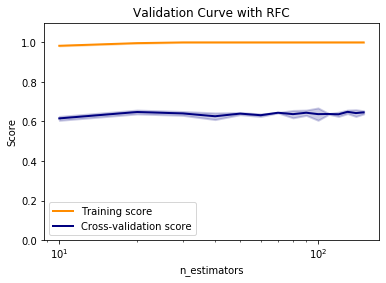



STAGE 2:


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of  30 | elapsed:    0.2s remaining:    2.2s
[Parallel(n_jobs=4)]: Done   7 out of  30 | elapsed:    0.4s remaining:    1.6s
[Parallel(n_jobs=4)]: Done  11 out of  30 | elapsed:    0.7s remaining:    1.3s
[Parallel(n_jobs=4)]: Done  15 out of  30 | elapsed:    0.9s remaining:    0.9s
[Parallel(n_jobs=4)]: Done  19 out of  30 | elapsed:    1.2s remaining:    0.6s
[Parallel(n_jobs=4)]: Done  23 out of  30 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=4)]: Done  27 out of  30 | elapsed:    1.9s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  30 out of  30 | elapsed:    2.1s finished


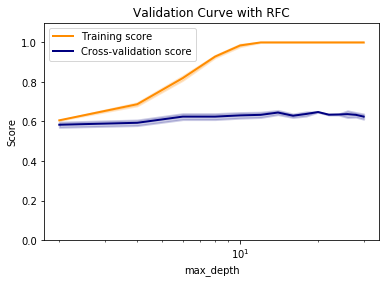

In [29]:
# Generate two validation curves to evaluate model performance with varying estimator count and forest depth
n_estimators = range(10,160,10)
train_scores, test_scores = validation_curve(RandomForestClassifier(max_depth=18),X_tr,y_tr,"n_estimators",n_estimators,cv=2,n_jobs=4,verbose=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(n_estimators, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(n_estimators, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(n_estimators, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(n_estimators, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

print("\n\nSTAGE 2:\n\n")

max_depth = range(2,32,2)
train_scores, test_scores = validation_curve(RandomForestClassifier(n_estimators=110),X_tr,y_tr,"max_depth",max_depth,cv=2,n_jobs=4,verbose=10)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with RFC")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(max_depth, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(max_depth, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(max_depth, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(max_depth, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [33]:
# Confusion matrix for optimal model
RFC = RandomForestClassifier(n_estimators=110, max_depth=18) #30/24
RFC.fit(X_tr,y_tr)
y_pred = RFC.predict(X_te)
confusion_matrix(y_te,y_pred)

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,   5,   4,   0,   0],
       [  0,   0, 155,  47,   1,   0],
       [  0,   1,  40, 145,  11,   0],
       [  0,   0,   3,  26,  31,   0],
       [  0,   0,   0,   7,   3,   0]], dtype=int64)

In [36]:
# Model validation at final, optimal, model hyperparameters
y_pred_1 = RFC.predict(X_tr)
print(f"Accuracy (n_estimators={110}, max_depth={18}):")
print("\tTraining Accuracy:",
    round(metrics.accuracy_score(y_tr,y_pred_1),6))
print("\t\tMean inaccuracy:",
    round(mean(y_pred_1-y_tr),6))
print("\t\tMSE:",
    round(MSE(y_tr,y_pred_1),6))
print(confusion_matrix(y_tr,y_pred_1))

y_pred_2 = RFC.predict(X_te)
print("\tValidation Accuracy:",
    round(metrics.accuracy_score(y_te,y_pred_2),6))
print("\t\tMean inaccuracy:",
    round(mean(y_pred_2-y_te),6))
print("\t\tMSE:",
    round(MSE(y_te,y_pred_2),6)) #0.114583
print(confusion_matrix(y_te,y_pred_2))

Accuracy (n_estimators=110, max_depth=18):
	Training Accuracy: 1.0
		Mean inaccuracy: 0.0
		MSE: 0.0
[[  9   0   0   0   0   0]
 [  0  44   0   0   0   0]
 [  0   0 478   0   0   0]
 [  0   0   0 441   0   0]
 [  0   0   0   0 139   0]
 [  0   0   0   0   0   8]]
	Validation Accuracy: 0.689583
		Mean inaccuracy: -0.033333
		MSE: 0.416667
[[  0   0   1   0   0   0]
 [  0   0   5   4   0   0]
 [  0   0 155  47   1   0]
 [  0   1  40 145  11   0]
 [  0   0   3  26  31   0]
 [  0   0   0   7   3   0]]
